# Layerwise evaluation on MNIST

In [3]:
import tensorflow as tf
from tensorflow.python.tools import inspect_checkpoint
from tensorflow.python import pywrap_tensorflow

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

In [4]:
def load_variables(file_name):
    reader = pywrap_tensorflow.NewCheckpointReader(file_name)
    var_to_shape_map = reader.get_variable_to_shape_map()
    var_values = dict()
    for key in sorted(var_to_shape_map):
        print("tensor_name: ", key)
#         print(reader.get_tensor(key))
        var_values.update({key: reader.get_tensor(key)})
    return var_values

In [5]:
# set checkpoint path

ckpt_path = '/media/oanaucs/Data/awp_trained_models/alexnet_fmnist_s0.5/model.ckpt-3728'

In [6]:
variables = load_variables(ckpt_path)

tensor_name:  conv1/biases
tensor_name:  conv1/weights
tensor_name:  conv2_1/biases
tensor_name:  conv2_1/weights
tensor_name:  conv2_2/biases
tensor_name:  conv2_2/weights
tensor_name:  conv3/biases
tensor_name:  conv3/weights
tensor_name:  conv4_1/biases
tensor_name:  conv4_1/weights
tensor_name:  conv4_2/biases
tensor_name:  conv4_2/weights
tensor_name:  conv5_1/biases
tensor_name:  conv5_1/weights
tensor_name:  conv5_2/biases
tensor_name:  conv5_2/weights
tensor_name:  fc6/biases
tensor_name:  fc6/weights
tensor_name:  fc7/biases
tensor_name:  fc7/weights
tensor_name:  fc8/biases
tensor_name:  fc8/weights


In [10]:
tensors_to_inspect = ['conv4_1/weights', 'conv4_2/weights', 
                      'conv5_1/weights', 'conv4_2/weights', 
                      'fc6/weights', 'fc7/weights',
                     ]

In [11]:
subplots_filename = './../eval_results/alexnet/alexnet_subplots.png'

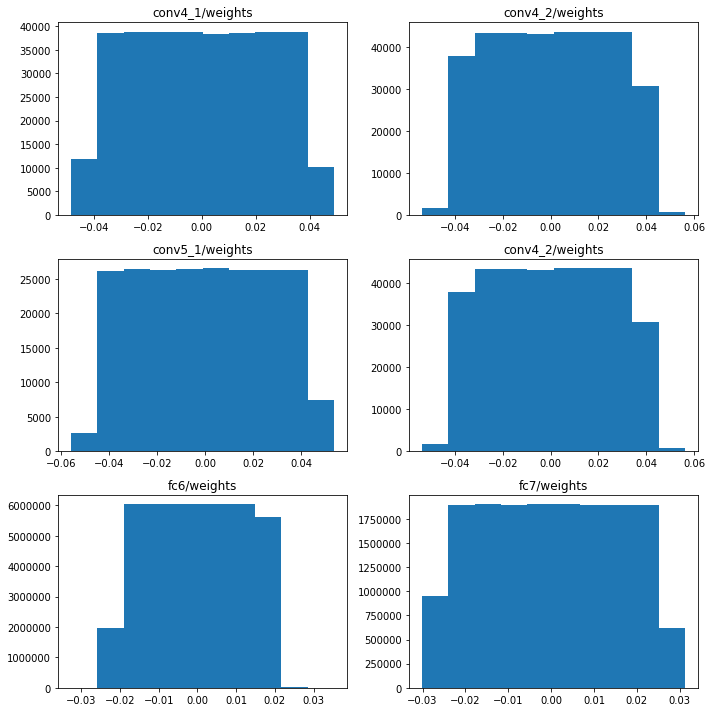

In [15]:
f,a = plt.subplots(3,2, figsize=(10,10))
a = a.ravel()

for idx,ax in enumerate(a):
    ax.hist(np.asarray(variables[tensors_to_inspect[idx]]).flatten())
    ax.set_title(tensors_to_inspect[idx])
plt.tight_layout()

plt.savefig(subplots_filename)